In [1]:
import pandas as pd

df = pd.read_csv('../datasets/SVM_Dataset1.csv', index_col=0)

In [2]:
df

,X1,X2,y
0,2.947814,6.626878,1
1,2.530388,7.785050,1
2,3.566991,5.651046,1
3,3.156983,5.467077,1
4,2.582346,4.457777,-1
5,2.155826,6.222343,-1
6,3.273418,3.520687,-1


In [3]:
6 * .75

4.5

In [6]:
import numpy as np

feature_cols = ['X1', 'X2']
X_train = np.array(df[feature_cols])
X_train

array([[2.947814, 6.626878],
       [2.530388, 7.78505 ],
       [3.566991, 5.651046],
       [3.156983, 5.467077],
       [2.582346, 4.457777],
       [2.155826, 6.222343],
       [3.273418, 3.520687]])

In [7]:
Y_train = df['y'].values
Y_train

array([ 1,  1,  1,  1, -1, -1, -1])

In [10]:
color_ls = []
for k in Y_train:
    if k == 1:
        color_ls.append('b')
    else:
        color_ls.append('r')
color_ls

['b', 'b', 'b', 'b', 'r', 'r', 'r']

In [13]:
label = []
for k in Y_train:
    if k == 1:
        label.append('H')
    else:
        label.append('NH')
label

['H', 'H', 'H', 'H', 'NH', 'NH', 'NH']

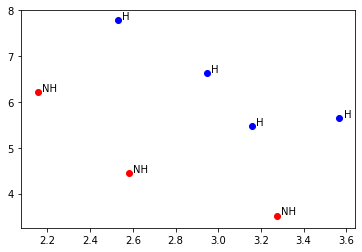

In [14]:
import matplotlib.pyplot as plt

for k, (i,j) in enumerate(X_train):
    plt.scatter(i, j, c = color_ls[k])
    plt.text(i+0.02, j+0.02, label[k])

In [16]:
from sklearn import svm

# svm_classifier = svm.SVC(kernel='poly',C=1, degree=2)

svm_classifier = svm.SVC(kernel='linear', C=10)
svm_classifier.fit(X_train, Y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [17]:
def plot_decision_boundary(clf, X, y):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max),np.arange(x2_min, x2_max))
    Z = clf.decision_function(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, colors='b', levels=[-1, 0, 1], alpha=0.4, linestyles=['--', '-', '--'])
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

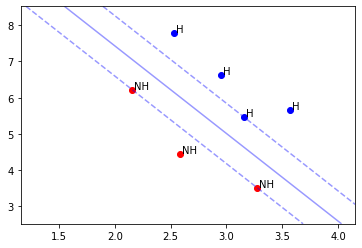

In [19]:
plot_decision_boundary(svm_classifier, X_train, Y_train)

for k, (i,j) in enumerate(X_train):
    plt.scatter(i, j, c = color_ls[k])
    plt.text(i+0.02, j+0.02, label[k])

In [20]:
# Number of Support Vectors for each class:

svm_classifier.n_support_

array([2, 1], dtype=int32)

In [21]:
# What are those Support Vectors:

svm_classifier.support_vectors_

array([[2.155826, 6.222343],
       [3.273418, 3.520687],
       [3.156983, 5.467077]])

In [22]:
weight=svm_classifier.coef_
intercept=svm_classifier.intercept_
print(weight)
print(intercept)

[[2.90336685 1.20121959]]
[-14.73321143]


In [24]:
svm_classifier.predict([[3,6]])

array([1])